In [ ]:
import pandas as pd

# CNN Cleaned
url_cnn = "https://drive.google.com/uc?id=1lnZIIkz5ELwBBBD1GuarIss8q8omW5Qn"
df_cnn = pd.read_excel(url_cnn)

# Kompas Cleaned
url_kompas = "https://drive.google.com/uc?id=1Nm7ueBjpsoBhBG7pmLmpYbiiJrbsA1wt"
df_kompas = pd.read_excel(url_kompas)

# Tempo Cleaned
url_tempo = "https://drive.google.com/uc?id=1rqYS4jOyvKr7wx5UskqoQ2s7orR8hPAM"
df_tempo = pd.read_excel(url_tempo)

# Turnbackhoax Cleaned
url_hoax = "https://drive.google.com/uc?id=1VRk3ne7wNYQCXU8mIBs1NU0lWNh2WU6m"
df_hoax = pd.read_excel(url_hoax)

# Cek data
print("CNN:", df_cnn.shape)
print("Kompas:", df_kompas.shape)
print("Tempo:", df_tempo.shape)
print("Turnbackhoax:", df_hoax.shape)

CNN: (9630, 9)
Kompas: (4750, 9)
Tempo: (6592, 9)
Turnbackhoax: (10381, 11)


In [ ]:
print(df_cnn.columns)
print(df_kompas.columns)
print(df_tempo.columns)
print(df_hoax.columns)

Index(['Unnamed: 0', 'Title', 'Timestamp', 'FullText', 'Tags', 'Author', 'Url',
       'text_new', 'hoax'],
      dtype='object')
Index(['Unnamed: 0', 'Title', 'Timestamp', 'FullText', 'Tags', 'Author', 'Url',
       'text_new', 'hoax'],
      dtype='object')
Index(['Unnamed: 0', 'Title', 'Timestamp', 'FullText', 'Tags', 'Author', 'Url',
       'text_new', 'hoax'],
      dtype='object')
Index(['Unnamed: 0', 'Title', 'Timestamp', 'FullText', 'Tags', 'Author', 'Url',
       'politik', 'Narasi', 'Clean Narasi', 'hoax'],
      dtype='object')


# Preprocessing

In [ ]:
import re
import pandas as pd

def simple_preprocess(text):
    if pd.isna(text):
        return ""
    # lowercase
    text = text.lower()
    # hapus karakter non-alfanumerik (selain huruf, angka, dan spasi)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    # hapus spasi berlebihan
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_cnn["clean_text"] = df_cnn["FullText"].astype(str).apply(simple_preprocess)
df_kompas["clean_text"] = df_kompas["FullText"].astype(str).apply(simple_preprocess)
df_tempo["clean_text"] = df_tempo["FullText"].astype(str).apply(simple_preprocess)
df_hoax["clean_text"] = df_hoax["FullText"].astype(str).apply(simple_preprocess)

In [ ]:
# CNN
print("=== Contoh CNN ===")
print("Sebelum:", df_cnn["FullText"].iloc[0])
print("Sesudah:", df_cnn["clean_text"].iloc[0])
print("="*60)

# Kompas
print("=== Contoh Kompas ===")
print("Sebelum:", df_kompas["FullText"].iloc[0])
print("Sesudah:", df_kompas["clean_text"].iloc[0])
print("="*60)

# Tempo
print("=== Contoh Tempo ===")
print("Sebelum:", df_tempo["FullText"].iloc[0])
print("Sesudah:", df_tempo["clean_text"].iloc[0])
print("="*60)

# Turnbackhoax
print("=== Contoh Turnbackhoax ===")
print("Sebelum:", df_hoax["FullText"].iloc[0])
print("Sesudah:", df_hoax["clean_text"].iloc[0])
print("="*60)

=== Contoh CNN ===
Sebelum: Jakarta, CNN Indonesia -- Mantan Gubernur DKI Jakarta Anies Baswedan menghadiri acara tasyakuran Milad ke-42 tahun Badan Kontak Majelis Taklim (BKMT) di Istora Senayan, Jakarta, Selasa (21/2).
Dia pun memuji eksistensi ibu-ibu pengajian mewujudkan keberhasilan pendidikan di dalam keluarga.
Ia mengatakan selama 42 tahun usianya, BKMT telah menjadi teladan keberhasilan pendidikan dalam keluarga. BKMT, kata dia, menjadi bukti bahwa pengajian menghasilkan ibu-ibu yang lebih berpengetahuan.


ADVERTISEMENT
















SCROLL TO RESUME CONTENT



"BKMT menjadi bukti bahwa pengajian menghasilkan ibu-ibu yang lebih berpengetahuan. Ibu-ibu yang punya bekal untuk mendidik anak-anaknya, membuat rumah yang mencerminkan nilai Islam dan akhlak yang baik," kata Anies dikutip dari unggahan akun media sosial Instagram miliknya.





Lihat Juga :




HNW Sebut PKS Deklarasi Anies Capres Secara Resmi Sebelum Rakernas







Dalam unggahannya, Anies menyinggung soal BKMT ya

# EDA

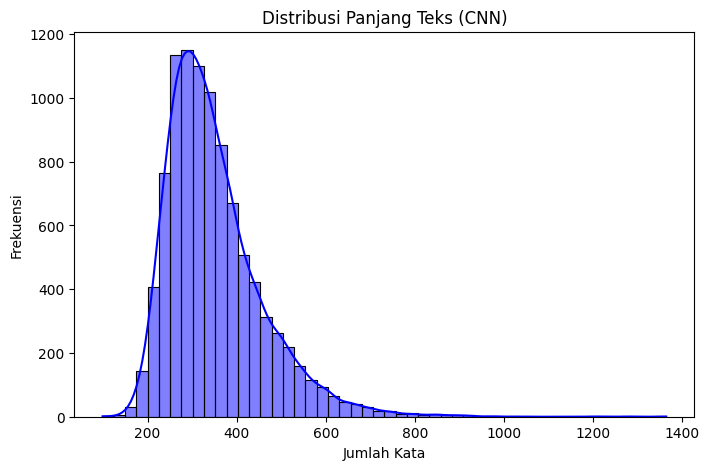

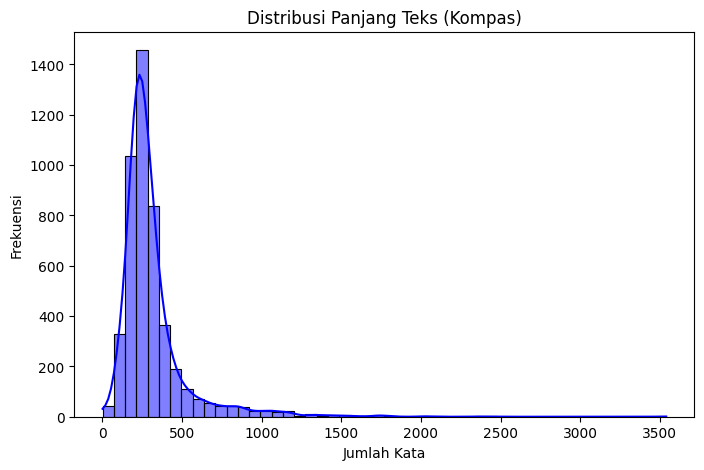

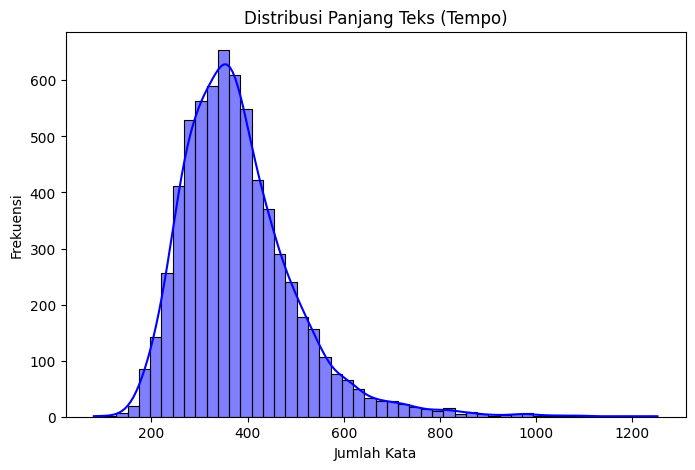

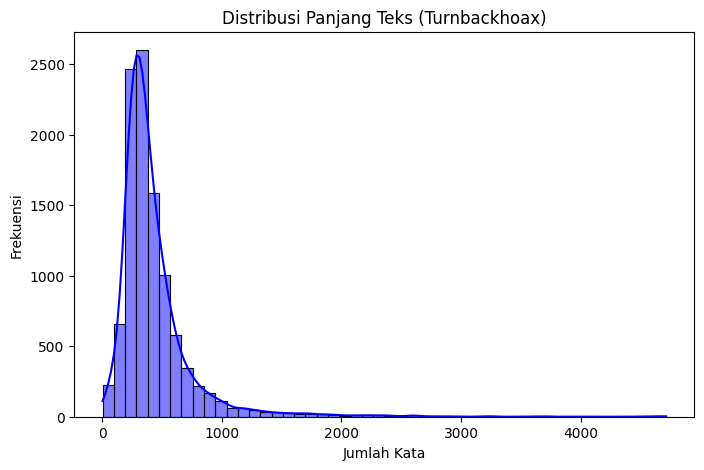

/tmp/ipython-input-3909061702.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


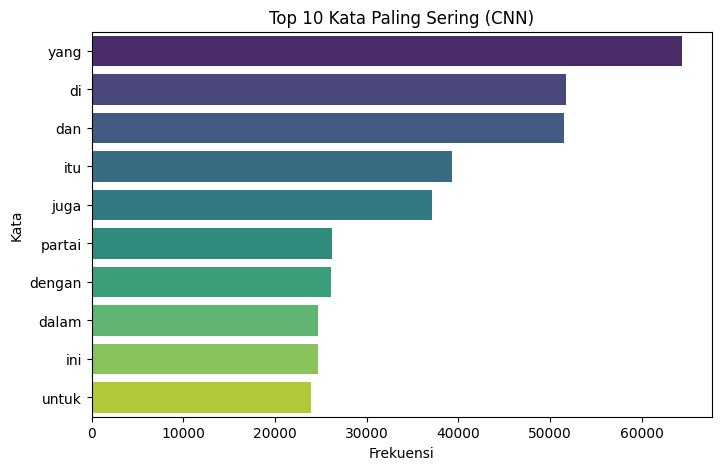

/tmp/ipython-input-3909061702.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


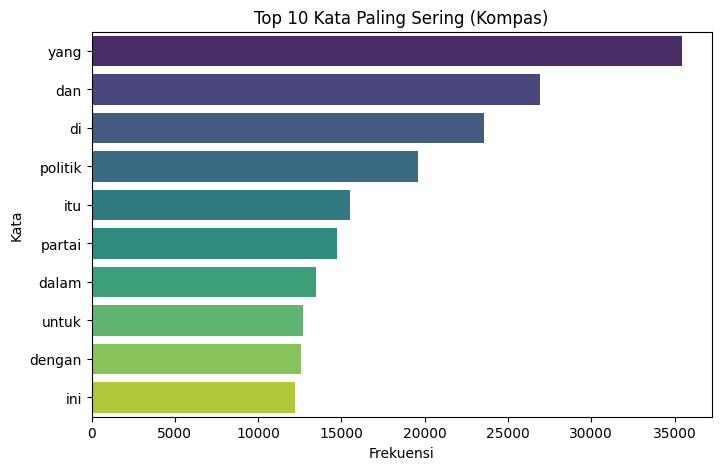

/tmp/ipython-input-3909061702.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


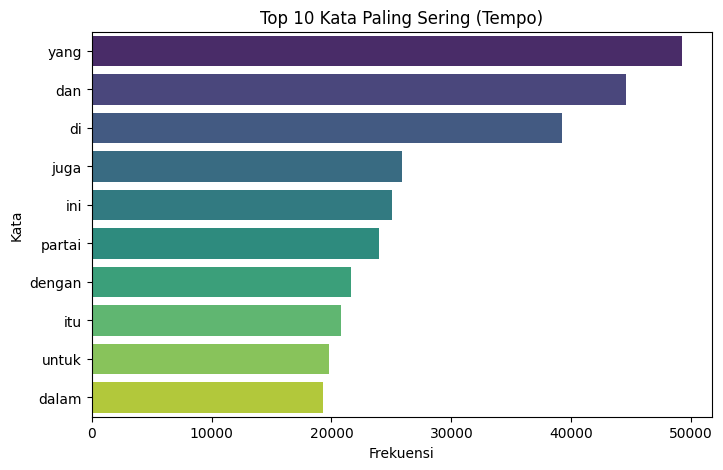

/tmp/ipython-input-3909061702.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


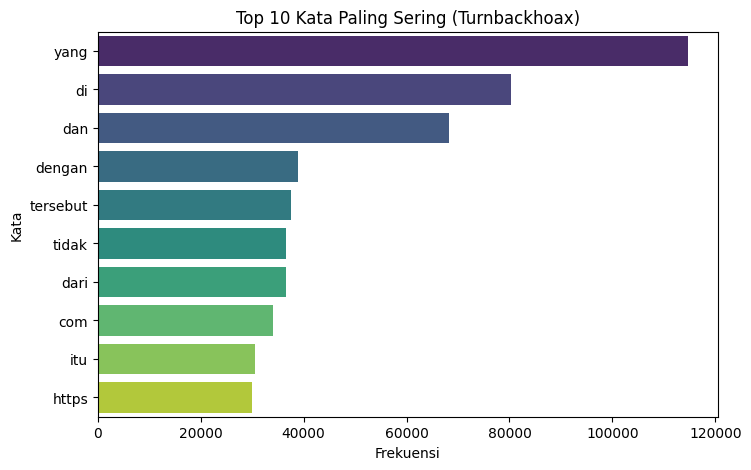

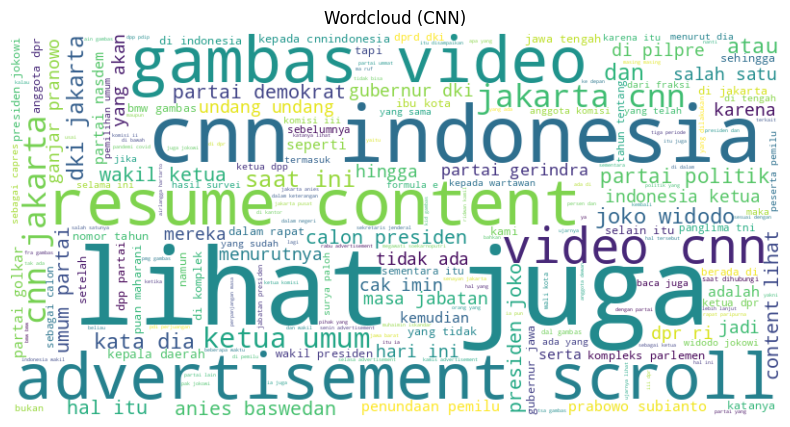

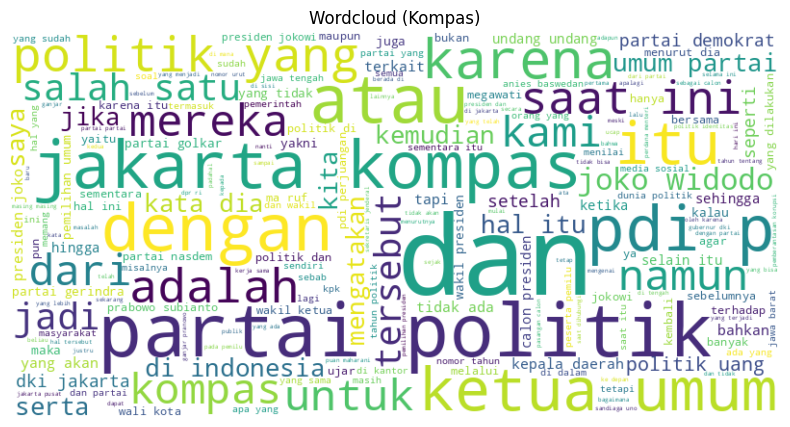

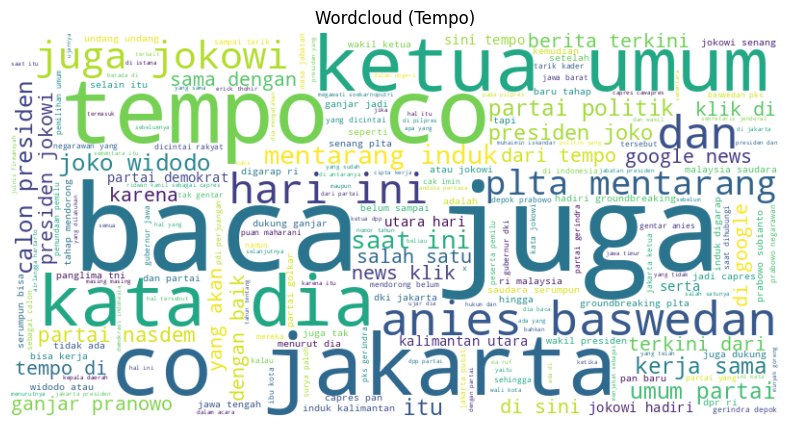

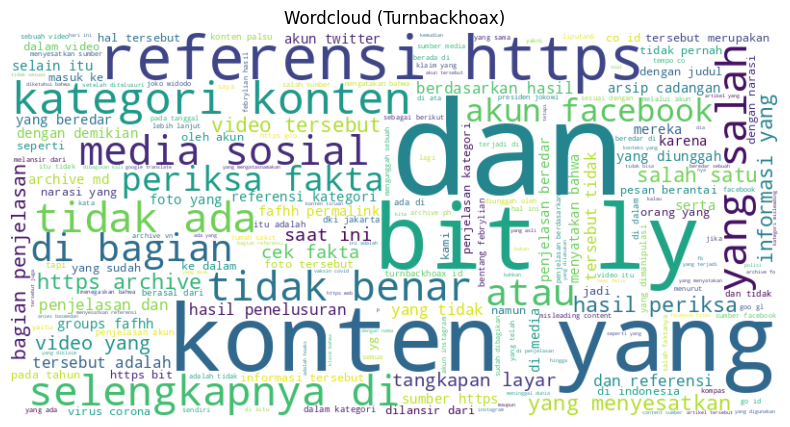

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# 1. Distribusi panjang teks
def plot_text_length(df, name):
    df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))
    plt.figure(figsize=(8,5))
    sns.histplot(df["text_length"], bins=50, kde=True, color="blue")
    plt.title(f"Distribusi Panjang Teks ({name})")
    plt.xlabel("Jumlah Kata")
    plt.ylabel("Frekuensi")
    plt.show()

plot_text_length(df_cnn, "CNN")
plot_text_length(df_kompas, "Kompas")
plot_text_length(df_tempo, "Tempo")
plot_text_length(df_hoax, "Turnbackhoax")


# 2. Top kata paling sering
from collections import Counter

def top_words(df, name, n=10):
    all_words = " ".join(df["clean_text"]).split()
    common_words = Counter(all_words).most_common(n)
    words, counts = zip(*common_words)

    plt.figure(figsize=(8,5))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top {n} Kata Paling Sering ({name})")
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")
    plt.show()

top_words(df_cnn, "CNN")
top_words(df_kompas, "Kompas")
top_words(df_tempo, "Tempo")
top_words(df_hoax, "Turnbackhoax")


# 3. Wordcloud
def plot_wordcloud(df, name):
    text = " ".join(df["clean_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud ({name})")
    plt.show()

plot_wordcloud(df_cnn, "CNN")
plot_wordcloud(df_kompas, "Kompas")
plot_wordcloud(df_tempo, "Tempo")
plot_wordcloud(df_hoax, "Turnbackhoax")

# Vectorization

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from google.colab import files

# 1. Gabungkan semua dataset
df_all = pd.concat([df_cnn, df_kompas, df_tempo, df_hoax], ignore_index=True)

# 2. Pisahkan fitur (X) dan label (y)
texts = df_all["clean_text"].astype(str)
y = df_all["hoax"]

# 3. Vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(texts)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Ubah ke DataFrame
X_train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
X_test_df  = pd.DataFrame(X_test.toarray(),  columns=vectorizer.get_feature_names_out())

X_train_df["label"] = y_train.values
X_train_df["split"] = "train"
X_test_df["label"]  = y_test.values
X_test_df["split"]  = "test"

# Gabungkan train & test
df_final = pd.concat([X_train_df, X_test_df], ignore_index=True)

# 6. Simpan ke CSV
df_final.to_csv("Data_berita_fakta_dan_hoax.csv", index=False)

# 7. Download ke lokal
files.download("Data_berita_fakta_dan_hoax.csv")

print("Data berhasil disimpan ke satu file: Data_berita_fakta_dan_hoax.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data berhasil disimpan ke satu file: Data_berita_fakta_dan_hoax.csv
